In [2]:
import pandas as pd

In [3]:
bike_rentals = pd.read_csv ('bike_rental_hour.csv')
print (bike_rentals.head(3))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  


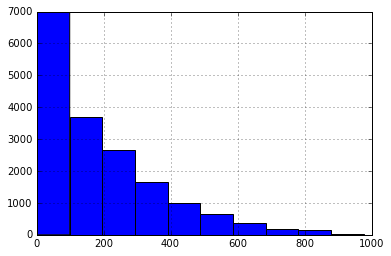

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
bike_rentals['cnt'].hist()

In [57]:
bike_rentals.corr().cnt.sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
time_label    0.385600
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [6]:
def assign_label (x):
    if x <= 6:
        return 1
    if x <= 12:
        return 2
    if x <= 18:
        return 3
    if x <= 24:
        return 4

In [7]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [8]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [24]:
times = pd.get_dummies(bike_rentals['time_label'], prefix_sep='-', drop_first=True)

In [35]:
variables = ['cnt', 'casual', 'weekday', 'registered']

In [37]:
bike_rentals[variables]

,cnt,casual,weekday,registered
0,16,3,6,13
1,40,8,6,32
2,32,5,6,27
3,13,3,6,10
4,1,0,6,1
5,1,0,6,1
6,2,2,6,0
7,3,1,6,2
8,8,1,6,7
9,14,8,6,6


In [38]:
df = bike_rentals[predictors].join(times, how='inner')

In [39]:
df.head(3)

,cnt,casual,weekday,registered,2,3,4
0,16,3,6,13,0,0,0
1,40,8,6,32,0,0,0
2,32,5,6,27,0,0,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train, test = train_test_split(df, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [43]:
y_train = train['cnt']
y_test = test['cnt']

In [44]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_pred = regressor.predict (X_test)

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error (y_test, y_pred)

32507.239188890453

In [54]:
from sklearn.metrics import r2_score
print (r2_score (y_test, y_pred))
print (r2_score (y_train, regressor.predict(X_train) ))

-0.0007388489313369107
0.0002872583717873356


### Iteration 1 Observations

1. (O) R^2 seems to indicate that selected indicators are arbitrary. = -0.0007388489313369107
2. (O) MSE looks high, though relative to what, nto yet clear. = 32507.239188890453
3. (N) Change predictors to registered and temperature (high correlations).
4. (N) Scale other predictors.
5. (Q) Should hours be a dummy variable?